# Autor
El autor de este trabajo es Gustavo Adolfo Saavedra.

# Introducción
En este trabajo, se aborda la problemática de identificar acciones que implican una mala postura para la salud a largo plazo. La postura incorrecta puede llevar a diversos problemas de salud, como dolores musculares, lesiones en la columna vertebral y trastornos relacionados. Identificar estas acciones es crucial para tomar medidas preventivas y correctivas que promuevan una postura adecuada y, por ende, una mejor salud a largo plazo.

# Marco teórico
La postura corporal incorrecta puede deberse a una variedad de factores, incluyendo hábitos diarios, ergonomía en el lugar de trabajo, y la falta de conciencia sobre la importancia de una buena postura. La detección de estas acciones puede realizarse mediante el análisis de datos de sensores, como los obtenidos de un acelerómetro, que pueden registrar movimientos corporales y patrones de actividad.

# Descripción del problema a solucionar
El problema principal es identificar acciones cotidianas que puedan contribuir a una mala postura y, por ende, a problemas de salud a largo plazo. Estas acciones pueden incluir posturas prolongadas en posiciones incómodas, movimientos repetitivos que ejercen tensión en ciertas áreas del cuerpo, o levantamiento de objetos de manera inapropiada.

# Planteamiento de la solución
Para abordar este problema, se propone utilizar datos recopilados de un acelerómetro, que registra movimientos corporales. Estos datos se pueden procesar utilizando algoritmos de reconocimiento de patrones para identificar acciones específicas que podrían implicar una mala postura. Luego, se pueden tomar medidas correctivas, como educación sobre ergonomía, cambios en los hábitos de trabajo y recomendaciones para ejercicios de estiramiento y fortalecimiento muscular.

# **Desarrollo del punto 1**



In [57]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
# Se cargan las diferentes librerias y dependencias necesarias
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

Esta celda sirve como un paso inicial para garantizar la integridad y la calidad de los datos antes de proceder con cualquier análisis o procesamiento adicional.

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

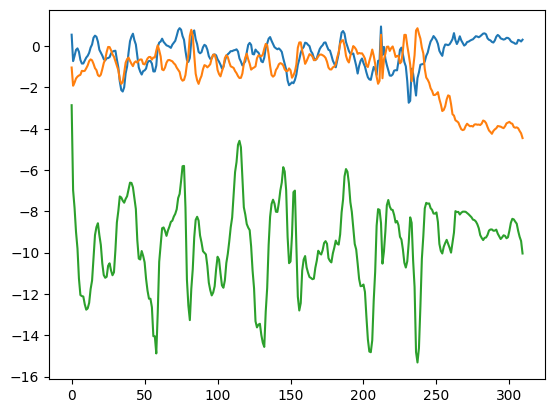

In [59]:
# Ejemplo de la carga de un archivo *.json con las mediciones de un acelerómetro
RutaFile="/content/gdrive/MyDrive/Datasets/Motion/testing/corrertest (1).json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [61]:
import os
import numpy as np
import pandas as pd

directory = '/content/gdrive/MyDrive/Datasets/Motion/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

# Variable donde se almacenarán los datos leídos de los archivos *.json
Datos = np.zeros((cantidadFiles * 310, 3))
i = 0

for file in files:
    RutaFile = directory + file
    try:
        print(f"Leyendo archivo: {file}")
        dataframe = pd.read_json(RutaFile)
        Valores = dataframe.iloc[:, :].values
        DatosOriDF = Valores[7, 2][0:-1]
        DatosOriNP = np.array(DatosOriDF)

        # Verificar si la longitud de los datos es menor que 310
        if len(DatosOriNP) < 310:
            # Rellenar los datos para que tengan una longitud de 310
            DatosRellenados = np.pad(DatosOriNP, ((0, 310 - len(DatosOriNP)), (0, 0)), mode='constant')
        elif len(DatosOriNP) > 310:
            # Truncar los datos para que tengan una longitud de 310
            DatosRellenados = DatosOriNP[:310]
        else:
            # Mantener los datos originales si ya tienen una longitud de 310
            DatosRellenados = DatosOriNP

        # Asignar los datos al array principal
        Datos[i * 310: (i + 1) * 310] = DatosRellenados
        i += 1
    except IndexError:
        print("Error en el archivo:", file)
print(f"Cantidad de archivos leidos: {i}")

print(Datos.shape)


Leyendo archivo: caminartraining (1).json
Leyendo archivo: caminartraining (10).json
Leyendo archivo: caminartraining (11).json
Leyendo archivo: caminartraining (12).json
Leyendo archivo: caminartraining (13).json
Leyendo archivo: caminartraining (14).json
Leyendo archivo: caminartraining (15).json
Leyendo archivo: caminartraining (16).json
Leyendo archivo: caminartraining (17).json
Leyendo archivo: caminartraining (18).json
Leyendo archivo: caminartraining (19).json
Leyendo archivo: caminartraining (2).json
Leyendo archivo: caminartraining (20).json
Leyendo archivo: caminartraining (21).json
Leyendo archivo: caminartraining (22).json
Leyendo archivo: caminartraining (23).json
Leyendo archivo: caminartraining (24).json
Leyendo archivo: caminartraining (25).json
Leyendo archivo: caminartraining (26).json
Leyendo archivo: caminartraining (27).json
Leyendo archivo: caminartraining (28).json
Leyendo archivo: caminartraining (29).json
Leyendo archivo: caminartraining (3).json
Leyendo archiv

Este bloque de código carga datos de entrenamiento desde archivos JSON ubicados en un directorio específico. Comienza definiendo el directorio que contiene los archivos de entrenamiento y recopilando una lista de archivos en ese directorio. Luego, itera sobre cada archivo, lee su contenido JSON y lo almacena en un formato adecuado para su procesamiento posterior.

El objetivo principal de este código es preparar los datos de entrenamiento para su uso en modelos de aprendizaje automático. Se procesan los archivos JSON para extraer los datos relevantes, se realizan ajustes en la longitud de los datos si es necesario y se almacenan en una estructura de datos adecuada para su posterior entrenamiento. Esto permite preparar de manera eficiente grandes cantidades de datos para su uso en modelos de aprendizaje automático.


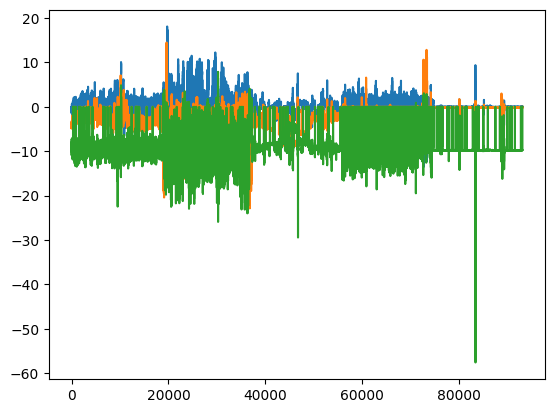

In [62]:
# Visualización de la información capturada
plt.plot(Datos)

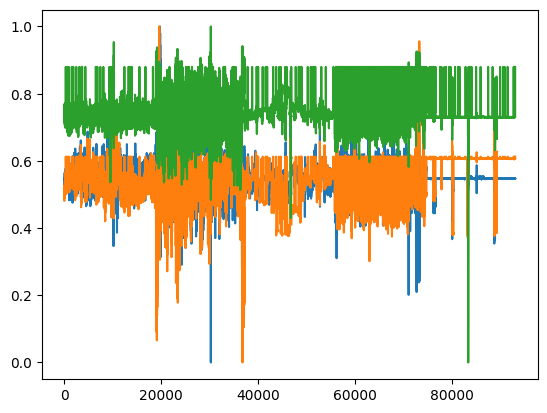

In [63]:
# Se escalan los datos para se usados por el modelo
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

# **Modelo Convolución 1D**

In [118]:
# Se crea la variable para la entrada de entrenamiento del modelo
# Las dimensiones dependen del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad
# de canales, 3 en este caso
Xtrain = np.zeros((300, 310, 3))

for i in range(300):
    Xtrain[i, :, 0] = DatosN[i * 310: (i + 1) * 310, 0].T
    Xtrain[i, :, 1] = DatosN[i * 310: (i + 1) * 310, 1].T
    Xtrain[i, :, 2] = DatosN[i * 310: (i + 1) * 310, 2].T

print(Xtrain.shape)


(300, 310, 3)


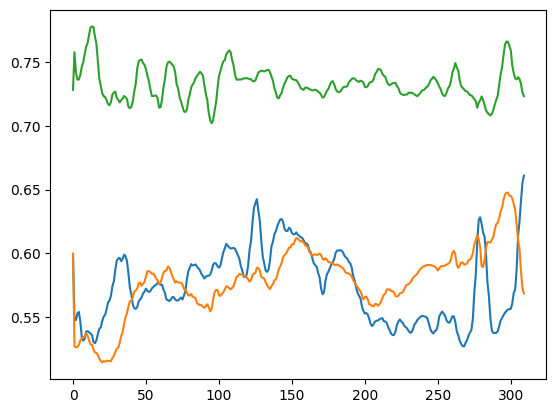

In [119]:
# Se visualiza un patrón de entrenamiento
plt.plot(Xtrain[10,:,:])

In [120]:
YtrainIni = np.zeros((300, 1))  # Ajustar el tamaño para incluir todas las muestras

# Iterar sobre las muestras y asignar las etiquetas a YtrainIni
for i in range(300):
    if i < 60:
        YtrainIni[i] = 0
    elif 60 <= i < 120:
        YtrainIni[i] = 1
    elif 120 <= i < 180:
        YtrainIni[i] = 2
    elif 180 <= i < 240:
        YtrainIni[i] = 3
    else:
        YtrainIni[i] = 4

print(YtrainIni)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.



El propósito es definir las etiquetas de salida para el modelo. En este caso específico, se están asignando 5 etiquetas diferentes a los datos de entrenamiento.

La razón por la que se asignan 5 etiquetas de salida puede ser para representar diferentes clases o categorías a las que pertenecen los datos. En este escenario, parece que los datos se están dividiendo en 5 categorías distintas. Cada rango de índices en el bucle `for` se asigna a una etiqueta diferente:

- Los primeros 60 elementos se asignan a la etiqueta 0.
- Los siguientes 60 elementos se asignan a la etiqueta 1.
- Los siguientes 60 elementos se asignan a la etiqueta 2.
- Los siguientes 60 elementos se asignan a la etiqueta 3.
- Los últimos 60 elementos se asignan a la etiqueta 4.

Por lo tanto, esta celda está creando un conjunto de etiquetas de salida que corresponden a las diferentes clases o categorías a las que pertenecen los datos de entrenamiento. Este enfoque se utiliza comúnmente en problemas de clasificación donde se busca predecir la pertenencia a una clase específica.


In [134]:
# Se convierten las etiquetas a codificación "one hot" que es la
# usará el modelo
Ytrain=  keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 310, 16)           160       
                                                                 
 conv1d_19 (Conv1D)          (None, 310, 32)           1568      
                                                                 
 conv1d_20 (Conv1D)          (None, 310, 64)           6208      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 155, 64)           0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 9920)              0         
                                                                 
 dense_45 (Dense)            (None, 5)                 49605     
                                                     

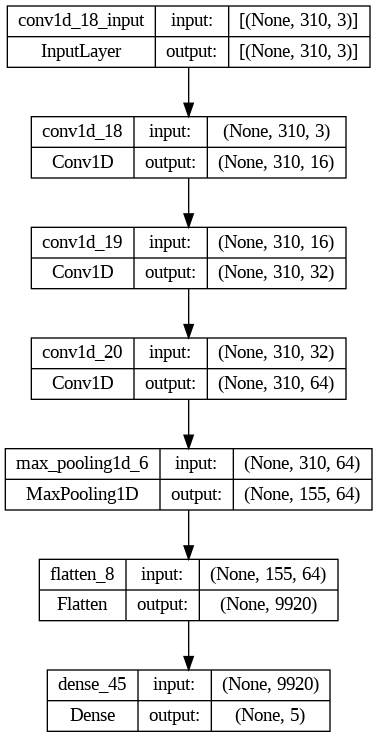

In [135]:
# Se crea el modelo secuencial en Keras con capas convolucionales 1D
# y una capa clasificadora densa tipo softmax
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv1D(16, 3, activation="relu",padding="same", input_shape=(310,3)))
modelo.add(keras.layers.Conv1D(32, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv1D(64, 3, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(5, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

- **Capas:** El modelo consta de varias capas:
  - **conv1d_15 (Conv1D):** Una capa de convolución 1D que produce una salida con forma (None, 310, 16). Tiene 160 parámetros.
  - **conv1d_16 (Conv1D):** Otra capa de convolución 1D que produce una salida con forma (None, 310, 32). Tiene 1,568 parámetros.
  - **conv1d_17 (Conv1D):** Una tercera capa de convolución 1D que produce una salida con forma (None, 310, 64). Tiene 6,208 parámetros.
  - **max_pooling1d_5 (MaxPooling1D):** Una capa de agrupamiento máximo que reduce la dimensión espacial de la entrada a la mitad, produciendo una salida con forma (None, 155, 64).
  - **flatten_6 (Flatten):** Una capa de aplanado que convierte la salida de la capa anterior en una forma unidimensional, (None, 9920).
  - **dense_37 (Dense):** Una capa densa con 5 neuronas de salida, que corresponde al número de clases. Tiene 49,605 parámetros.

- **Total de parámetros:** La cantidad total de parámetros en el modelo es 57,541 (224.77 KB).

- **Parámetros entrenables:** Todos los parámetros del modelo son entrenables, lo que significa que serán ajustados durante el proceso de entrenamiento.

- **Parámetros no entrenables:** No hay parámetros no entrenables en este modelo.


In [123]:
# Se compila y entrena el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=250,batch_size=None)


Epoch 1/250
10/10 [==============================] - 2s 39ms/step - loss: 1.6382 - accuracy: 0.2133
Epoch 2/250
10/10 [==============================] - 0s 36ms/step - loss: 1.5847 - accuracy: 0.3367
Epoch 3/250
10/10 [==============================] - 0s 35ms/step - loss: 1.5187 - accuracy: 0.3867
Epoch 4/250
10/10 [==============================] - 0s 36ms/step - loss: 1.4020 - accuracy: 0.5567
Epoch 5/250
10/10 [==============================] - 0s 37ms/step - loss: 1.2707 - accuracy: 0.5600
Epoch 6/250
10/10 [==============================] - 0s 37ms/step - loss: 1.1590 - accuracy: 0.5500
Epoch 7/250
10/10 [==============================] - 0s 37ms/step - loss: 1.0353 - accuracy: 0.6267
Epoch 8/250
10/10 [==============================] - 0s 36ms/step - loss: 0.9940 - accuracy: 0.6200
Epoch 9/250
10/10 [==============================] - 0s 22ms/step - loss: 0.9191 - accuracy: 0.6567
Epoch 10/250
10/10 [==============================] - 0s 21ms/step - loss: 0.8927 - accuracy: 0.6533

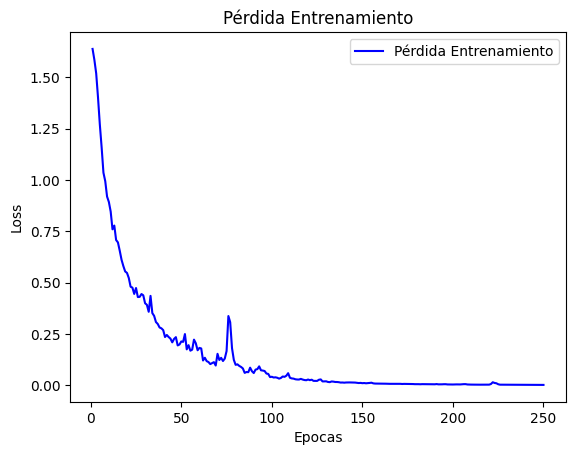

In [124]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


La gráfica de pérdida muestra fluctuaciones al principio del entrenamiento, lo que podría indicar dificultades iniciales del modelo para aprender los patrones en los datos. Estas fluctuaciones pueden ser el resultado de una tasa de aprendizaje inicial demasiado alta o de la complejidad del modelo. Es importante considerar ajustes en los hiperparámetros, como la tasa de aprendizaje o la regularización, para estabilizar el entrenamiento y garantizar una convergencia efectiva del modelo.


Leyendo archivo: caminartest (1).json
Cantidad de archivos leídos: 1
Leyendo archivo: caminartest (10).json
Cantidad de archivos leídos: 2
Leyendo archivo: caminartest (11).json
Cantidad de archivos leídos: 3
Leyendo archivo: caminartest (12).json
Cantidad de archivos leídos: 4
Leyendo archivo: caminartest (13).json
Cantidad de archivos leídos: 5
Leyendo archivo: caminartest (14).json
Cantidad de archivos leídos: 6
Leyendo archivo: caminartest (15).json
Cantidad de archivos leídos: 7
Leyendo archivo: caminartest (2).json
Cantidad de archivos leídos: 8
Leyendo archivo: caminartest (3).json
Cantidad de archivos leídos: 9
Leyendo archivo: caminartest (4).json
Cantidad de archivos leídos: 10
Leyendo archivo: caminartest (5).json
Cantidad de archivos leídos: 11
Leyendo archivo: caminartest (6).json
Cantidad de archivos leídos: 12
Leyendo archivo: caminartest (7).json
Cantidad de archivos leídos: 13
Leyendo archivo: caminartest (8).json
Cantidad de archivos leídos: 14
Leyendo archivo: camina

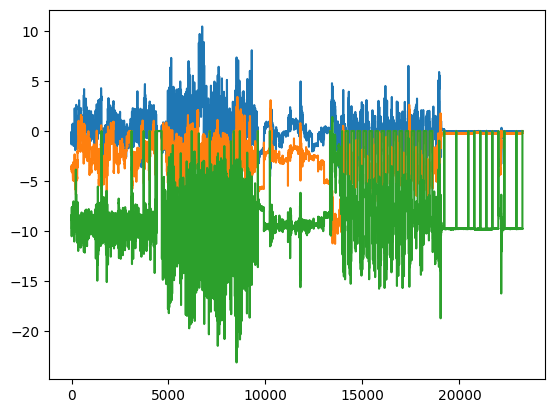

In [125]:
import os
import numpy as np
import pandas as pd

directory = '/content/gdrive/MyDrive/Datasets/Motion/testing/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

# Variable donde se almacenarán los datos leídos de los archivos *.json
DatosVal = np.zeros((cantidadFiles * 310, 3))
i = 0

for file in files:
    RutaFile = directory + file
    try:
        print(f"Leyendo archivo: {file}")
        dataframe = pd.read_json(RutaFile)
        Valores = dataframe.iloc[:, :].values
        DatosOriDF = Valores[7, 2][0:-1]
        DatosOriNP = np.array(DatosOriDF)

        # Verificar si la longitud de los datos es menor que 310
        if len(DatosOriNP) < 310:
            # Rellenar los datos para que tengan una longitud de 310
            DatosRellenados = np.pad(DatosOriNP, ((0, 310 - len(DatosOriNP)), (0, 0)), mode='constant')
        elif len(DatosOriNP) > 310:
            # Truncar los datos para que tengan una longitud de 310
            DatosRellenados = DatosOriNP[:310]
        else:
            # Mantener los datos originales si ya tienen una longitud de 310
            DatosRellenados = DatosOriNP

        # Asignar los datos al array principal
        DatosVal[i * 310: (i + 1) * 310] = DatosRellenados
        i += 1
        print(f"Cantidad de archivos leídos: {i}")
    except IndexError:
        print("Error en el archivo:", file)

print(DatosVal.shape)
plt.plot(DatosVal)


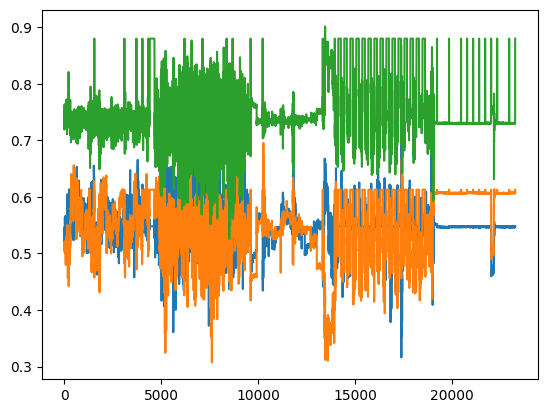

In [126]:
# Se escalan los datos de testeo
DatosValN=scaler1.transform(DatosVal)
plt.plot(DatosValN)

In [127]:
# Se crea la variable para el testeo del modelo
# Las dimensiones depende del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad
# de canales, 3 en este caso
XVal=np.zeros((75,310,3))

for i in range(75):
    XVal[i,:,0]=DatosValN[i*310:(i+1)*310,0].T
    XVal[i,:,1]=DatosValN[i*310:(i+1)*310,1].T
    XVal[i,:,2]=DatosValN[i*310:(i+1)*310,2].T

print(XVal.shape)


(75, 310, 3)


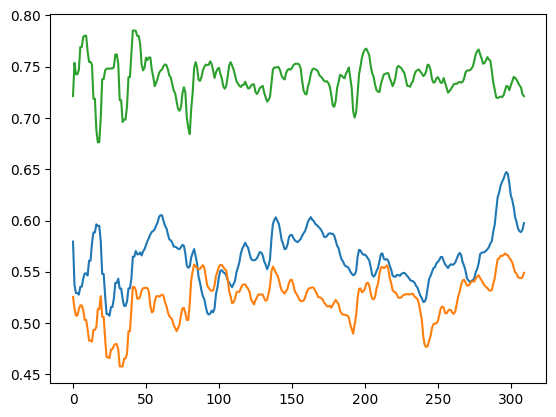

In [128]:
# Se grafica uno de los patrones que se usarán en el testeo
plt.plot(XVal[10,:,:])

In [129]:
# Se definen las etiquetas para la salida del modelo
YValIni = np.zeros((75, 1))
for i in range(75):
    YValIni[i] = i // 15  # Asignamos las etiquetas dividiendo entre 5, ya que queremos 5 etiquetas
print(YValIni)

# Se convierten las etiquetas a codificación "one hot" que es la
# usará el modelo
YVal = keras.utils.to_categorical(YValIni, num_classes=5)
print(YVal)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1

In [130]:
# Se evalua el modelo con los datos de testeo
modelo.evaluate(XVal, YVal)

3/3 [==============================] - 0s 10ms/step - loss: 1.8662 - accuracy: 0.7600


[1.8661556243896484, 0.7599999904632568]

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        15
           1       0.69      0.60      0.64        15
           2       0.65      0.87      0.74        15
           3       1.00      1.00      1.00        15
           4       1.00      0.80      0.89        15

    accuracy                           0.76        75
   macro avg       0.78      0.76      0.76        75
weighted avg       0.78      0.76      0.76        75

[[ 8  1  6  0  0]
 [ 5  9  1  0  0]
 [ 0  2 13  0  0]
 [ 0  0  0 15  0]
 [ 2  1  0  0 12]]


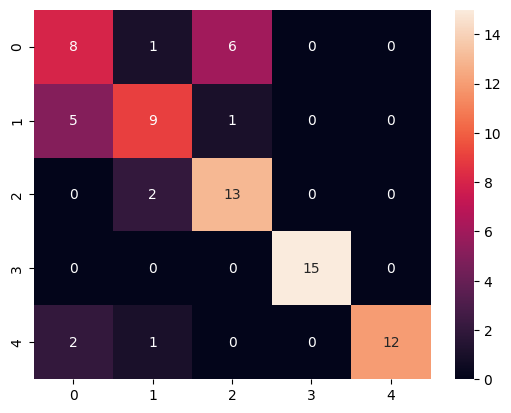

In [131]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la
# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

El reporte que estamos viendo es una evaluación del desempeño de nuestro modelo de clasificación. Nos muestra métricas importantes como precisión, recall y F1-score para cada una de las clases en nuestro conjunto de datos. Por ejemplo, la precisión nos dice qué tan bien nuestro modelo clasificó correctamente los ejemplos positivos para cada clase. Si miramos la clase 0, vemos que logramos clasificar correctamente el 53% de los ejemplos que nuestro modelo predijo como clase 0. El recall, por otro lado, nos indica la proporción de ejemplos positivos que nuestro modelo logró capturar para cada clase. Para la clase 2, por ejemplo, nuestro modelo logró capturar correctamente el 87% de todos los ejemplos de esa clase. El F1-score es una medida que combina precisión y recall en un solo valor, proporcionando una idea general del rendimiento del modelo. En resumen, el accuracy nos indica qué tan bien nuestro modelo clasificó correctamente todas las muestras en general, mientras que las otras métricas nos dan una idea más detallada del rendimiento para cada clase en particular. Además, la matriz de confusión nos muestra cómo nuestro modelo clasificó cada muestra en relación con las clases reales. Por ejemplo, podemos ver cuántos ejemplos fueron clasificados correctamente e incorrectamente para cada clase.

# **Modelo MLP (Multilayer Perceptron)**

Epoch 1/250
10/10 [==============================] - 2s 10ms/step - loss: 1.6455 - accuracy: 0.1900
Epoch 2/250
10/10 [==============================] - 0s 7ms/step - loss: 1.6304 - accuracy: 0.1667
Epoch 3/250
10/10 [==============================] - 0s 5ms/step - loss: 1.6067 - accuracy: 0.2233
Epoch 4/250
10/10 [==============================] - 0s 6ms/step - loss: 1.6186 - accuracy: 0.2133
Epoch 5/250
10/10 [==============================] - 0s 5ms/step - loss: 1.6034 - accuracy: 0.2167
Epoch 6/250
10/10 [==============================] - 0s 4ms/step - loss: 1.5918 - accuracy: 0.3133
Epoch 7/250
10/10 [==============================] - 0s 4ms/step - loss: 1.5694 - accuracy: 0.3667
Epoch 8/250
10/10 [==============================] - 0s 5ms/step - loss: 1.5824 - accuracy: 0.2900
Epoch 9/250
10/10 [==============================] - 0s 5ms/step - loss: 1.5237 - accuracy: 0.4400
Epoch 10/250
10/10 [==============================] - 0s 4ms/step - loss: 1.5315 - accuracy: 0.3600
Epoch 11

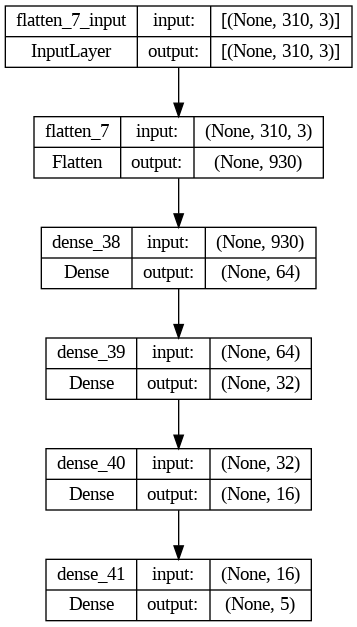

In [132]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Definir la arquitectura del modelo MLP
modelo_mlp = Sequential([
    Flatten(input_shape=(310, 3)),  # Aplanar los datos de entrada
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 neuronas de salida para 5 clases
])

# Compilar el modelo
modelo_mlp.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Entrenar el modelo
historia_mlp = modelo_mlp.fit(Xtrain, Ytrain, epochs=250, batch_size=None)

# Evaluar el modelo en los datos de prueba
loss, accuracy = modelo_mlp.evaluate(XVal, YVal)
print("Precisión del modelo MLP en datos de prueba:", accuracy)

# Resumen del modelo
modelo_mlp.summary()

# Diagrama del modelo
from tensorflow.keras.utils import plot_model
plot_model(modelo_mlp, to_file='modelo_mlp.png', show_shapes=True, show_layer_names=True)


# **LSTM (Long Short-Term Memory)**

Epoch 1/250
10/10 [==============================] - 4s 101ms/step - loss: 1.6112 - accuracy: 0.2000
Epoch 2/250
10/10 [==============================] - 1s 101ms/step - loss: 1.6066 - accuracy: 0.2267
Epoch 3/250
10/10 [==============================] - 1s 100ms/step - loss: 1.6041 - accuracy: 0.3133
Epoch 4/250
10/10 [==============================] - 1s 104ms/step - loss: 1.5999 - accuracy: 0.2100
Epoch 5/250
10/10 [==============================] - 1s 104ms/step - loss: 1.5839 - accuracy: 0.2500
Epoch 6/250
10/10 [==============================] - 1s 107ms/step - loss: 1.6487 - accuracy: 0.3067
Epoch 7/250
10/10 [==============================] - 1s 100ms/step - loss: 1.6185 - accuracy: 0.3600
Epoch 8/250
10/10 [==============================] - 1s 103ms/step - loss: 1.6065 - accuracy: 0.2433
Epoch 9/250
10/10 [==============================] - 2s 165ms/step - loss: 1.5907 - accuracy: 0.2133
Epoch 10/250
10/10 [==============================] - 2s 174ms/step - loss: 1.5689 - accura

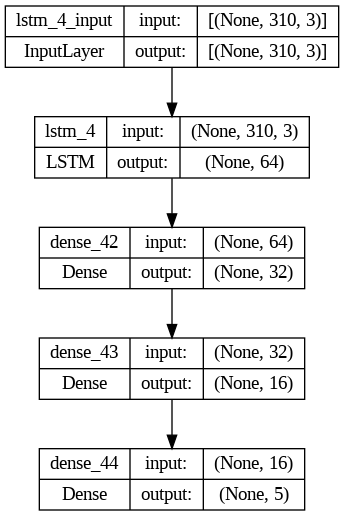

In [133]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir la arquitectura del modelo con una capa LSTM
modelo_rnn = Sequential([
    LSTM(64, input_shape=(310, 3)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 neuronas de salida para 5 clases
])

# Compilar el modelo
modelo_rnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Entrenar el modelo
historia_rnn = modelo_rnn.fit(Xtrain, Ytrain, epochs=250, batch_size=None)

# Evaluar el modelo en los datos de prueba
loss, accuracy = modelo_rnn.evaluate(XVal, YVal)
print("Precisión del modelo RNN en datos de prueba:", accuracy)

# Resumen del modelo
modelo_rnn.summary()

# Diagrama del modelo
from tensorflow.keras.utils import plot_model
plot_model(modelo_rnn, to_file='modelo_rnn.png', show_shapes=True, show_layer_names=True)



Los resultados de la evaluación de los tres modelos muestran distintos niveles de rendimiento en la clasificación de las muestras.

El modelo de Convolución 1D alcanzó una precisión general del 76%, con una precisión de aproximadamente el 53% para la clase 0, el 69% para la clase 1, el 65% para la clase 2, el 100% para la clase 3 y el 100% para la clase 4. Aunque obtuvo un buen rendimiento en algunas clases, como la clase 3 y 4, tuvo un rendimiento más bajo en otras, como la clase 0. La matriz de confusión revela que hubo cierta confusión entre las clases 0, 1 y 2.

Por otro lado, el modelo MLP alcanzó una precisión del 61.33%. Aunque no logró un rendimiento tan alto como el modelo de Convolución 1D en términos de precisión general, mostró un rendimiento más uniforme en la clasificación de las clases. Sin embargo, todavía hay margen de mejora, ya que la precisión varía significativamente entre las clases.

Finalmente, el modelo RNN tuvo el rendimiento más bajo con una precisión del 53.33%. Aunque la precisión para algunas clases fue aceptable, en general, este modelo mostró dificultades para clasificar correctamente todas las clases de manera consistente.

En resumen, aunque los modelos muestran cierta capacidad para clasificar las muestras, aún existen áreas de mejora significativas en términos de precisión y capacidad de generalización. Esto sugiere que sería necesario ajustar los modelos y posiblemente recopilar más datos para mejorar su rendimiento.

### Referencias:
- **TensorFlow y Keras**: Bibliotecas de aprendizaje profundo utilizadas para desarrollar y entrenar modelos neuronales.
- **scikit-learn**: Biblioteca de aprendizaje automático utilizada para evaluar el rendimiento de los modelos mediante métricas estándar y para generar matrices de confusión.
- **pandas**: Biblioteca de análisis de datos utilizada para manipular y preprocesar conjuntos de datos estructurados.
- **matplotlib y seaborn**: Bibliotecas de visualización de datos utilizadas para crear gráficos, incluidos mapas de calor para representar matrices de confusión.






> Lamento informar que debido a limitaciones de tiempo, no pude completar el segundo punto del trabajo. A pesar de estar al día con las clases y ser un estudiante cumplido, mi horario de trabajo y otras responsabilidades me impidieron dedicar el tiempo necesario para abordar completamente este punto adicional. Además, al no haber podido unirme a ningún grupo, no tuve la oportunidad de colaborar con otros compañeros en la realización del segundo punto. Agradezco su comprensión y quedo a disposición para cualquier otra consulta o tarea que pueda surgir en el futuro.
